In [2]:
# coding: utf-8
import sys
sys.path.append('..')
from common.np import *  # import numpy as np
from common.layers import Embedding
from negative_sampling_layer import NegativeSamplingLoss

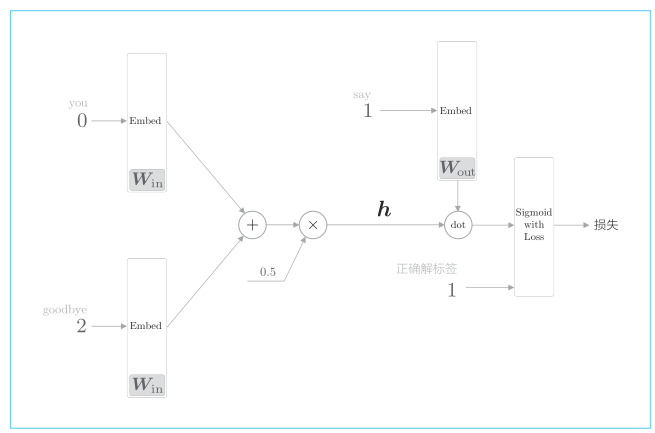

In [1]:
class CBOW:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(V, H).astype('f')  # 此处W_out进行了转置
        
        self.in_layers = []
        for i in range(2 * window_size):
            layer = Embedding(W_in) 
            self.in_layers.append(layer)
        self.ns_loss  = NegativeSamplingLoss(W_out, corpus, power=0.75, sample_size=5)
        
        layers = self.in_layers + [self.ns_loss]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h = 0
        for i, layer in enumerate(self.in_layers):
            h += layer.forward(contexts[:, i])
        h *= 1 / len(self.in_layers)
        loss = self.ns_loss.forward(h, target)
        return loss

contexts, target格式如下图右侧所示

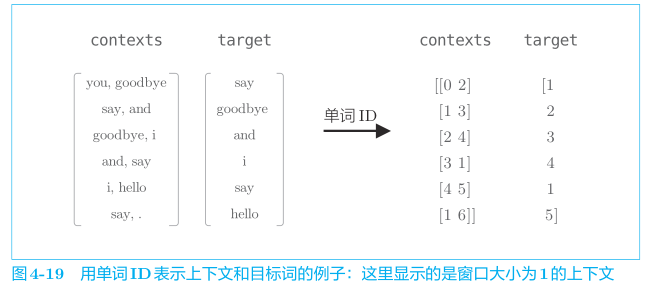

__init__中W_out进行了转置，因为与h相乘的是W_out的列向量，转置后按行取方便计算，具体见EmbeddingDot层的forward实现

 ```python
  for i, layer in enumerate(self.in_layers):
            h += layer.forward(contexts[:, i])
        h *= 1 / len(self.in_layers)
 ```
 
 相当于上图的两个上下文扩展成了2*window_size个上下文,后进行的求和求平均计算，并且是mini-batch的，每一行对应一个样本